<h2>Outline</h2>
<ul>
    <li>Introduction</li>
    <li>Principal Component Analysis:
        <ul><li>Concept</li>
            <li>Implementation</li>
            <li>Pros and Cons</li>
        </ul>
    </li>    
    <li>Other methods</li>
</ul>

<h2>1. Introduction</h2>

In [220]:
import pandas as pd

df = pd.read_csv('datasets/crime_data_curated.csv')
df.head()

,Unnamed: 0,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,num_violent_crimes
0,54,Toledocity,OH,95.0,77000.0,1,332943,2.54,19.70,76.96,...,5502.0,1698.29,15251.0,4707.51,4517.0,1394.26,357.0,110.19,984.96,7910.25
1,55,Philadelphiacity,PA,101.0,60000.0,1,1585577,2.63,39.86,53.52,...,15117.0,988.14,39181.0,2561.10,23785.0,1554.73,2282.0,149.17,1279.60,5253.14
2,58,Lynchburgcity,VA,680.0,47672.0,1,66049,2.63,26.41,72.45,...,560.0,833.83,2316.0,3448.48,184.0,273.97,50.0,74.45,753.42,4630.73
3,99,NewHaventown,CT,9.0,52070.0,1,130474,2.66,36.14,53.85,...,3417.0,2856.93,7719.0,6453.80,1873.0,1566.00,134.0,112.04,2127.02,10988.76
4,122,Springfieldcity,OH,23.0,74118.0,1,70487,2.59,17.38,81.61,...,963.0,1362.13,4048.0,5725.76,457.0,646.41,6.0,8.49,1497.92,7742.79


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Columns: 148 entries, Unnamed: 0 to num_violent_crimes
dtypes: float64(116), int64(30), object(2)
memory usage: 128.5+ KB


In [222]:
X = df.iloc[:,6:145]
y = df.iloc[:,[-1]]

In [223]:
from sklearn.feature_selection import r_regression

N_f = len(X.columns)

r_coefs = r_regression(X,y)#compute the pearson correlation for each feature
r_dict = {'coefs':[]}
r_coefs_df = pd.DataFrame(r_dict)
for i in range(N_f):
    r_coefs_df.loc[X.columns[i],'coefs'] = r_coefs[i]**2
r_coefs_df = r_coefs_df.sort_values(by=['coefs'],ascending=False)
#r_coefs_df.head(20)
#X=X.drop(columns=['burglPerPop','larcPerPop'])
X=X.drop(columns=['larcPerPop'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [224]:
X.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,autoTheft,autoTheftPerPop,arsons
0,332943,2.54,19.70,76.96,1.05,3.97,14.78,28.65,14.52,12.25,...,1594.0,492.02,1195.0,368.86,5502.0,1698.29,15251.0,4517.0,1394.26,357.0
1,1585577,2.63,39.86,53.52,2.74,5.63,13.92,28.02,14.12,13.74,...,11531.0,753.74,6821.0,445.86,15117.0,988.14,39181.0,23785.0,1554.73,2282.0
2,66049,2.63,26.41,72.45,0.76,0.72,17.79,29.84,18.19,14.33,...,107.0,159.32,351.0,522.63,560.0,833.83,2316.0,184.0,273.97,50.0
3,130474,2.66,36.14,53.85,2.41,13.22,17.06,34.55,19.17,10.81,...,1238.0,1035.08,1154.0,964.85,3417.0,2856.93,7719.0,1873.0,1566.00,134.0
4,70487,2.59,17.38,81.61,0.51,0.65,16.05,28.26,15.37,13.59,...,208.0,294.21,786.0,1111.77,963.0,1362.13,4048.0,457.0,646.41,6.0


In [225]:
from sklearn.preprocessing import StandardScaler

Sc = StandardScaler()
X_sc = Sc.fit_transform(X)#features are normalised
X_sc = pd.DataFrame(X_sc, columns = X.columns)

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X_sc,y, test_size=0.2, random_state=1234)

In [227]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

Text(0.5, 1.0, 'R2 score- test - MLR: 0.16')

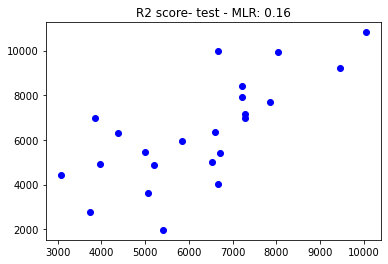

In [228]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_test = mlr.predict(X_test)
r2_score_test_mlr = metrics.r2_score(y_test,y_pred_test)

plt.figure()
plt.scatter(y_test,y_pred_test,color="blue")
plt.title('R2 score- test - MLR: %.2f'%(r2_score_test_mlr))

<h2>2. Principal Component Analysis</h2>

<h3>2.1. Concept</h3><br/>
Principal component analysis is a dimensional reduction technique that <b>project</b> the data into a lower-dimensional space
which optimally maintain data explanation or variance.

Consider a matrix X of m rows and n columns representing the dataset:<br/><br/> X = 
$\begin{pmatrix}
a_{11} & a_{12} & ... &a_{1n}\\
a_{21} & a_{22} & ... &a_{2n}\\
a_{31} & a_{32} & ... &a_{3n}\\
.&.&...&.\\
a_{m1} & a_{m2} & ... &a_{mn}\\
\end{pmatrix}$

The task of PCA is to project the matrix by linear transformation leading to <b>a matrix with fewer columns</b> that maintain maximal information content (i.e. variance). We thus need a transformation matrix <b>W</b> of n by p that can yield fewer columns.

W = $\begin{pmatrix}
w_{11} & w_{12} & ... &w_{1p}\\
w_{21} & w_{22} & ... &w_{2p}\\
w_{31} & w_{32} & ... &w_{3p}\\
.&.&...&.\\
w_{n1} & w_{n2} & ... &w_{np}\\
\end{pmatrix}$ such that

$X.W$ yields $D$, the transformed datasets:

$D = \begin{pmatrix}
a_{11} & a_{12} & ... &a_{1n}\\
a_{21} & a_{22} & ... &a_{2n}\\
a_{31} & a_{32} & ... &a_{3n}\\
.&.&...&.\\
a_{m1} & a_{m2} & ... &a_{mn}\\
\end{pmatrix}\begin{pmatrix}
w_{11} & w_{12} & ... &w_{1p}\\
w_{21} & w_{22} & ... &w_{2p}\\
w_{31} & w_{32} & ... &w_{3p}\\
.&.&...&.\\
w_{n1} & w_{n2} & ... &w_{np}\\
\end{pmatrix}=\begin{pmatrix}
d_{11} & d_{12} & ... &d_{1p}\\
d_{21} & d_{22} & ... &d_{2p}\\
d_{31} & d_{32} & ... &d_{3p}\\
.&.&...&.\\
d_{m1} & d_{m2} & ... &d_{mp}\\
\end{pmatrix}$

This mapping leatures to new features $d_1,d_2,...d_p$, called principal components that are obtained as a linear combination of original features:

$$
d_i = w_{1i}x_1+w_{2i}x_2+w_{3i}x_3+..+w_{ni}x_n
$$
How do we find $W$?

<b>Algorithm - PCA</b>

<img src="Media/alg1.png"/>

<img src="Media/pca_flow1.png"/>

<img src="Media/pca_flow2.png"/>

<b> Data Transformation</b>

Given the dataset $X_{m x n}$, Find the mean per feature $\mu_i = \frac{1}{m}\sum_{j=1}^{m}x_{ji}$

<ol>
    <li>Center the dataset: $D_{m x n} = X_{m x n} -\mu$</li>
    <li>Find the covariance matrix: $C_{n x n} = \frac{1}{n-1}D_{m x n}D_{m x n}^T$</li>
    <li>Compute Eigen vectors $V =[v_1,v_2,..v_n]$ and $\lambda_i$ values: $C_{mxn}v_i = \lambda_iv_i, i=1,2,..n$</li>
    <li>Sort eigenvectors per eigen values and select the top $p$ to form $W=[v_1,v_2,..v_p]$ </li>
    <li>Transform the data:</li>
</ol>
$$
D_{m x p} = D_{m x n}. W_{n x p}
$$

<b> Data Reconstruction</b>

$$
D_{m x n} = D_{m x n}. W_{n x p}^T
$$<br/>
$$
X_{m x n}^{\prime} = D_{m x n} + \mu
$$

<h3>2.2. Implementation in Python</h3>

In [229]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_sc)
X_transformed = pca.transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
X_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,3.887484e+06,-2.572838e+06,7.006723e+06,2.425728e+06,-1.878584e+06,2.769570e+06,1.543663e+06,-8.671705e+05,1.595558e+06,2.536796e+06,...,2.873327e+06,3.655068e+05,8.072983e+05,6.518563e+05,1.031015e+06,-2.799514e+06,-1.272562e+06,-9.373296e+05,1.340369e+06,6.814121e+05
1,2.722730e+07,-1.814982e+07,4.865789e+07,1.697228e+07,-1.306317e+07,1.970517e+07,1.064154e+07,-6.094465e+06,1.120362e+07,1.754911e+07,...,2.054978e+07,2.463191e+06,6.402131e+06,4.868006e+06,6.862722e+06,-1.951541e+07,-8.923221e+06,-6.471670e+06,9.173634e+06,5.091268e+06
2,5.117150e+05,-3.227672e+05,9.979238e+05,3.366443e+05,-2.635473e+05,3.459027e+05,2.188172e+05,-9.012130e+04,2.281414e+05,3.412410e+05,...,3.773129e+05,3.726341e+04,9.063371e+04,9.821031e+04,1.473979e+05,-3.828779e+05,-1.710680e+05,-1.321836e+05,1.888882e+05,8.324752e+04
3,1.647860e+06,-1.054465e+06,3.106205e+06,1.060036e+06,-8.416652e+05,1.139606e+06,6.804370e+05,-3.364472e+05,7.015787e+05,1.101247e+06,...,1.238999e+06,1.536453e+05,3.352192e+05,2.921119e+05,4.373243e+05,-1.225912e+06,-5.550509e+05,-4.004416e+05,5.711146e+05,2.828944e+05
4,5.338030e+05,-3.389275e+05,1.014984e+06,3.431018e+05,-2.661371e+05,3.622236e+05,2.268550e+05,-8.244374e+04,2.430435e+05,3.348728e+05,...,3.794451e+05,3.561784e+04,9.217609e+04,1.085756e+05,1.441122e+05,-3.859362e+05,-1.718187e+05,-1.387278e+05,1.988849e+05,8.512768e+04


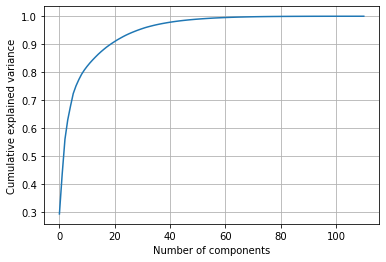

In [230]:
import numpy as np
# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()

In [231]:
pca = PCA(n_components = 30)
#pca = PCA(0.95)
pca.fit(X_sc)
X_transformed = pca.transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
X_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3.887484e+06,-2.572838e+06,7.006723e+06,2.425728e+06,-1.878584e+06,2.769570e+06,1.543663e+06,-8.671705e+05,1.595558e+06,2.536796e+06,...,-1.862568e+06,114503.558719,-8639.571499,-5.100611e+05,2.891606e+05,-3.472055e+05,4.912531e+05,7.501736e+05,-7.463344e+05,1.516399e+06
1,2.722730e+07,-1.814982e+07,4.865789e+07,1.697228e+07,-1.306317e+07,1.970517e+07,1.064154e+07,-6.094465e+06,1.120362e+07,1.754911e+07,...,-1.306009e+07,937800.399039,40099.960527,-3.640157e+06,1.716969e+06,-2.646404e+06,2.959579e+06,5.363883e+06,-5.065260e+06,1.031927e+07
2,5.117150e+05,-3.227672e+05,9.979238e+05,3.366443e+05,-2.635473e+05,3.459027e+05,2.188172e+05,-9.012130e+04,2.281414e+05,3.412410e+05,...,-2.353238e+05,34688.566215,-32967.270147,-5.160563e+04,5.392183e+04,-3.452873e+04,6.742893e+04,9.190140e+04,-1.087974e+05,2.072067e+05
3,1.647860e+06,-1.054465e+06,3.106205e+06,1.060036e+06,-8.416652e+05,1.139606e+06,6.804370e+05,-3.364472e+05,7.015787e+05,1.101247e+06,...,-7.820024e+05,77386.075962,-65984.619493,-1.835246e+05,1.366151e+05,-1.192138e+05,2.205454e+05,3.079109e+05,-3.366211e+05,6.709209e+05
4,5.338030e+05,-3.389275e+05,1.014984e+06,3.431018e+05,-2.661371e+05,3.622236e+05,2.268550e+05,-8.244374e+04,2.430435e+05,3.348728e+05,...,-2.382399e+05,38790.655762,-26122.965923,-5.654548e+04,6.010607e+04,-5.182944e+04,5.861073e+04,9.650573e+04,-1.034604e+05,2.053718e+05


In [235]:
pca.explained_variance_ratio_[:3]#Explained variance

array([0.29347376, 0.14203274, 0.12466962])

In [232]:
X_sc = Sc.fit_transform(X_transformed_df)#features are normalised
X_sc_transformed_df= pd.DataFrame(X_sc, columns = X_transformed_df.columns)
X_sc_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.529277,-0.537416,0.516663,0.518415,-0.511094,0.535837,0.514351,-0.539596,0.513905,0.517684,...,-0.527030,0.292936,1.009910,-0.562104,0.541038,-0.539992,0.537299,0.522031,-0.504137,0.515166
1,6.862447,-6.878490,6.868667,6.891740,-6.846410,6.937848,6.764230,-6.690218,6.878767,6.767153,...,-6.839538,8.290620,2.066267,-6.796582,6.317842,-6.843993,6.088234,6.859985,-6.663368,6.679425
2,-0.386725,0.378543,-0.399707,-0.396882,0.403715,-0.380360,-0.395765,0.374708,-0.391940,-0.396302,...,0.390315,-0.482405,0.482643,0.351040,-0.410720,0.317314,-0.415825,-0.382252,0.405057,-0.401603
3,-0.078437,0.080683,-0.078184,-0.079940,0.076250,-0.080323,-0.078650,0.084872,-0.078312,-0.079920,...,0.082130,-0.067632,-0.232959,0.088286,-0.076149,0.085122,-0.071487,-0.085515,0.080157,-0.076884
4,-0.380732,0.371964,-0.397106,-0.394053,0.402248,-0.374190,-0.390243,0.383741,-0.382068,-0.398953,...,0.388671,-0.442556,0.630983,0.341201,-0.385699,0.269878,-0.435656,-0.375927,0.412668,-0.402888


Text(0.5, 1.0, 'R2 score- test - MLR: 0.82')

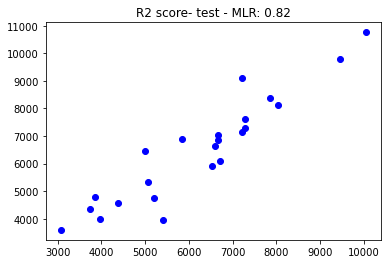

In [233]:
X_train_tr, X_test_tr, y_train_tr, y_test_tr  = train_test_split(X_sc_transformed_df,y, test_size=0.2, random_state=1234)
mlr_transformed = LinearRegression()
mlr.fit(X_train_tr,y_train_tr)

y_pred_test_tr = mlr.predict(X_test_tr)
r2_score_test_mlr_tr = metrics.r2_score(y_test_tr,y_pred_test_tr)

plt.figure()
plt.scatter(y_test_tr,y_pred_test_tr,color="blue")
plt.title('R2 score- test - MLR: %.2f'%(r2_score_test_mlr_tr))

<h3>2.3. Pros and Cons of PCA</h3>

<b>Pros</b>
<ul>
    <li>Effective in finding optimal representation of data with few dimensions</li>
    <li>Decrease redundancy and filter noise in the data</li>
    <li>Visualisation of datasets with high dimensionality</li>
    <li>Improve performance of learning models</li>
</ul>

<b>Cons</b>
<ul>
    <li>May result in some loss of information</li>
    <li>Variables may become less interpretable after transformation</li>
</ul>